In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
chi = [117.34,113.6,111,110,105,98.4,94.5,95,93,90,87.16,81.66,80,75,71.4,68.6,66.4]
new_chi = [(element - 90) for element in chi]
x = [55,60.03,64.97,70,75,79.98,90.1,95,100.1,105,110,115.2,119.93,125.13,130,135,139.95]
pi = [element + (-210) for element in x]
new_pi = [element / (-2) for element in pi]
#print(new_pi)
#print(new_chi)

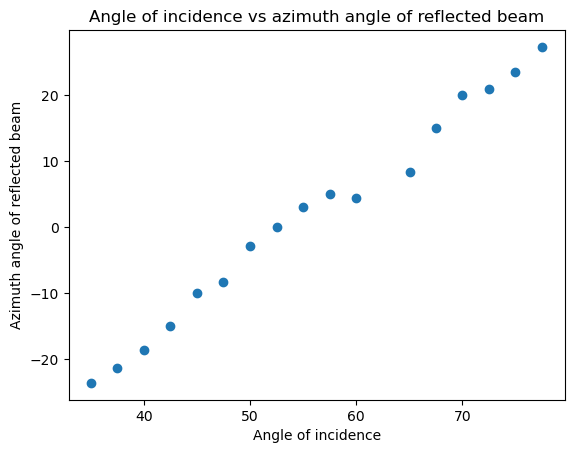

In [3]:
plt.scatter(new_pi,new_chi)
plt.xlabel("Angle of incidence")
plt.ylabel("Azimuth angle of reflected beam")
plt.title("Angle of incidence vs azimuth angle of reflected beam")
plt.show()

In [4]:
p=np.polyfit(np.array(new_pi),np.array(new_chi),1)

In [5]:
new_y=np.polyval(p,np.array(new_pi))
#print(sum(abs(new_y-new_chi))/len(new_y))

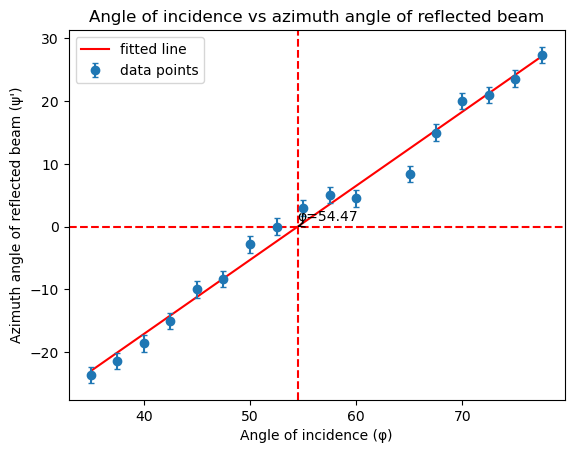

In [6]:
plt.plot(np.array(new_pi),new_y,'r',label="fitted line")

plt.errorbar(np.array(new_pi),np.array(new_chi),yerr=1.3,fmt='o',capsize=2,label='data points')
plt.xlabel("Angle of incidence (φ)")
plt.ylabel("Azimuth angle of reflected beam (ψ')")
plt.title("Angle of incidence vs azimuth angle of reflected beam")
plt.legend()
horizontal_line_y = 0

def find_x_for_y(x_data, y_data, y_value):
    f = interp1d(y_data, x_data, kind='linear')
    return f(y_value)
x_for_desired_y = np.round(find_x_for_y(np.array(new_pi),new_y, 0),2)
plt.axhline(y=horizontal_line_y, color='r', linestyle='--')
plt.axvline(x=x_for_desired_y, color='red', linestyle='--', label='Vertical Line at x=3')

plt.annotate(f'φ={x_for_desired_y}', xy=(x_for_desired_y, 0), xytext=(x_for_desired_y, 0 + 1),
             arrowprops=dict(arrowstyle="->", color='black'), ha='left')
dpi = 1000
#plt.savefig(file_name, dpi=dpi, bbox_inches='tight')
#error = np.std(np.array(new_chi))
#print(error)